# Predicting Credit Card Fraud

The goal for this analysis is to predict credit card fraud in the transactional data. I will be using tensorflow to build the predictive model, and t-SNE to visualize the dataset in two dimensions at the end of this analysis. If you would like to learn more about the data, visit: https://www.kaggle.com/dalpozz/creditcardfraud.

The sections of this analysis include: 

 - Exploring the Data
 - Building the Neural Network 
 - Visualizing the Data with t-SNE.

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import torch as tc
# from show_confusion_matrix import show_confusion_matrix 
# the above is from http://notmatthancock.github.io/2015/10/28/confusion-matrix.html

In [2]:
df = pd.read_csv("data/creditcard.csv")

## Exploring the Data

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The data is mostly transformed from its original form, for confidentiality reasons.

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

No missing values, that makes things a little easier.

Let's see how time compares across fraudulent and normal transactions.

In [6]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Time[df.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


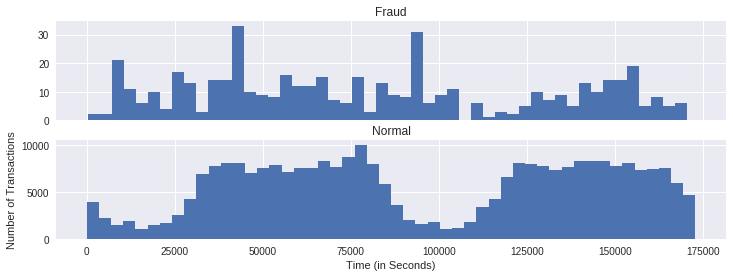

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

The 'Time' feature looks pretty similar across both types of transactions. You could argue that fraudulent transactions are more uniformly distributed, while normal transactions have a cyclical distribution. This could make it easier to detect a fraudulent transaction during at an 'off-peak' time.

Now let's see if the transaction amount differs between the two types.

In [8]:
print ("Fraud")
print (df.Amount[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Amount[df.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


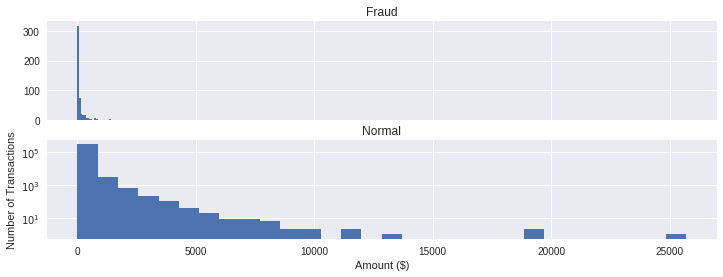

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Most transactions are small amounts, less than \$100. Fraudulent transactions have a maximum value far less than normal transactions, \$2,125.87 vs \$25,691.16.

Let's compare Time with Amount and see if we can learn anything new.

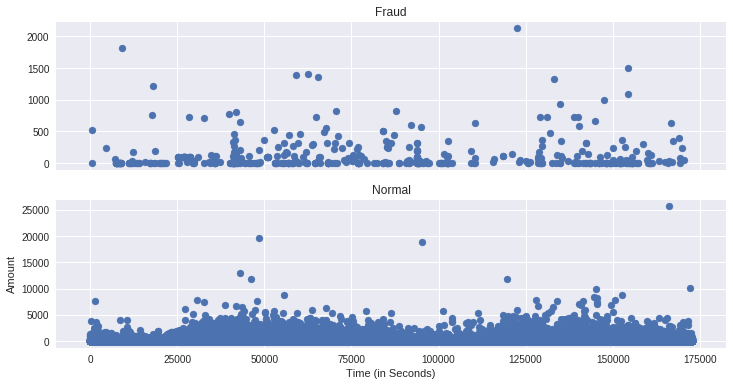

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Nothing too useful here.

Next, let's take a look at the anonymized features.

In [11]:
#Select only the anonymized features.
v_features = df.ix[:,1:30].columns

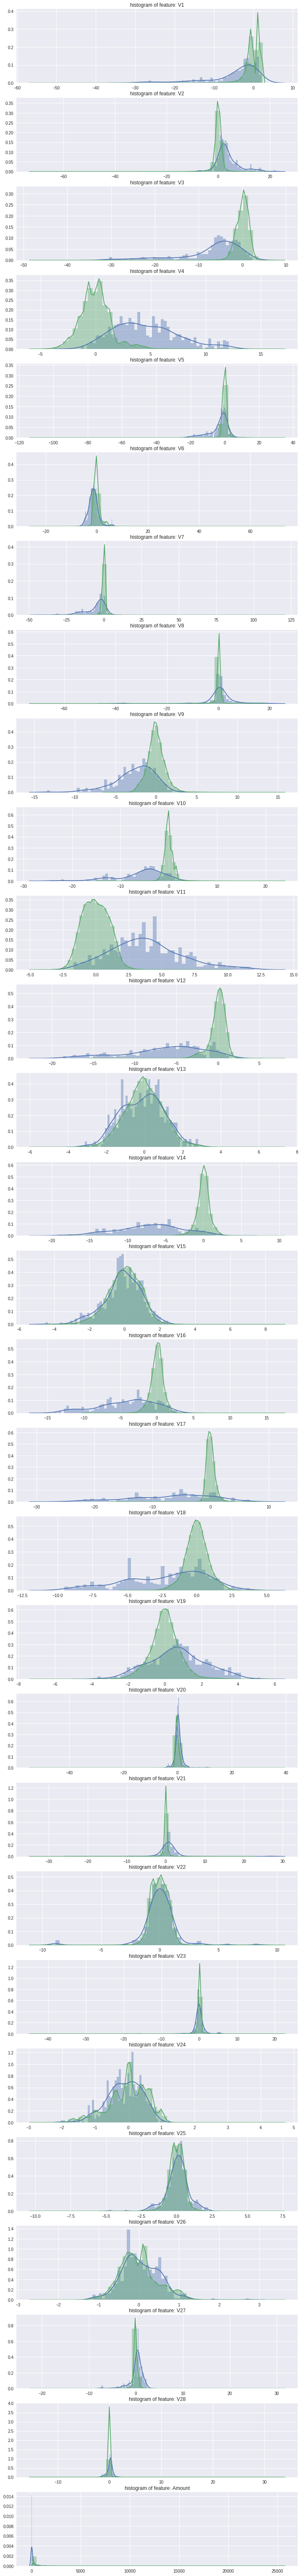

In [12]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(29, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

## Discovering Correlations

In [13]:
corr_tresh = 2 / len(df)

In [14]:
corr = df.corr()
corr = corr - np.eye(corr.shape[0])
corr_relevance = np.abs(corr) >= corr_tresh
corr_relevance
corr_relevance.sum()

Time      30
V1         3
V2         3
V3         3
V4         3
V5         3
V6         3
V7         3
V8         3
V9         3
V10        3
V11        3
V12        3
V13        3
V14        3
V15        3
V16        3
V17        3
V18        3
V19        3
V20        3
V21        3
V22        3
V23        3
V24        3
V25        3
V26        3
V27        3
V28        3
Amount    30
Class     30
dtype: int64

In [15]:
X = df.ix[:, 1:-2].values

In [16]:
from sklearn.decomposition import PCA

In [17]:
for i in range(25, 29):
    pca = PCA(n_components=i)
    pca.fit(X)
    s = np.sum(pca.explained_variance_ratio_)
    print("{:2d} Components: {:.2f}% variance".format(i, (s * 100)))

25 Components: 98.36% variance
26 Components: 99.12% variance
27 Components: 99.65% variance
28 Components: 100.00% variance


Features seems pretty much decorrelated as expected

### Preparing data to Neural Net

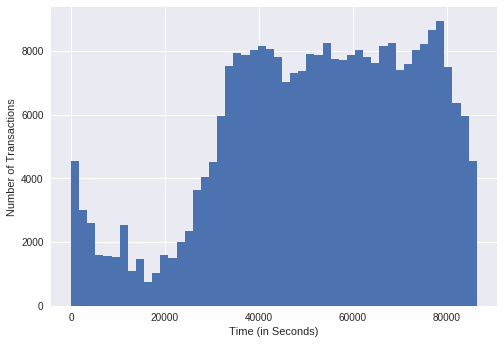

In [18]:
# Normalize time
plt.figure()

df["hours"] = df.Time % (60 * 60 * 24)
bins = 50
plt.hist(df.hours, bins=bins)

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [19]:
y = df['Class']
X = df.drop(["Time", "Class"], axis=1)
print(X.columns)
print(X.shape, y.shape)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'hours'],
      dtype='object')
(284807, 30) (284807,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)

frauds_count_train = np.sum(y_train == 1)
normal_count_train = np.sum(y_train == 0)
fraud_percentage_train = 100 * frauds_count_train / (frauds_count_train + normal_count_train)

frauds_count_test = np.sum(y_test == 1)
normal_count_test = np.sum(y_test == 0)
fraud_percentage_test = 100 * frauds_count_test / (frauds_count_test + normal_count_test)

print("Fraud porcentage\n\nTrain: {:.3f}\nTest: {:.3f}".format(fraud_percentage_train, fraud_percentage_test))

Fraud porcentage

Train: 0.170
Test: 0.179


In [21]:
X_train.as_matrix().astype('float32').dtype, y_train.as_matrix().dtype

(dtype('float32'), dtype('int64'))

In [22]:
y_train.as_matrix().astype('uint8')

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [23]:
X_train_tc = tc.from_numpy(X_train.as_matrix().astype('float32'))
y_train_tc = tc.from_numpy(y_train.as_matrix().astype('uint8'))
X_test_tc = tc.from_numpy(X_test.as_matrix().astype('float32'))
y_test_tc = tc.from_numpy(y_test.as_matrix().astype('uint8'))

tc.save(X_train_tc, "data/X_train.p")
tc.save(y_train_tc, "data/y_train.p")
tc.save(X_test_tc, "data/X_test.p")
tc.save(y_test_tc, "data/y_test.p")

In [24]:
print(X_train_tc.size())
print(X_test_tc.size())

torch.Size([199364, 30])
torch.Size([85443, 30])
